# **POTD 9 November**
## ***[Minimum sum partition](https://practice.geeksforgeeks.org/problems/minimum-sum-partition3317/1)***

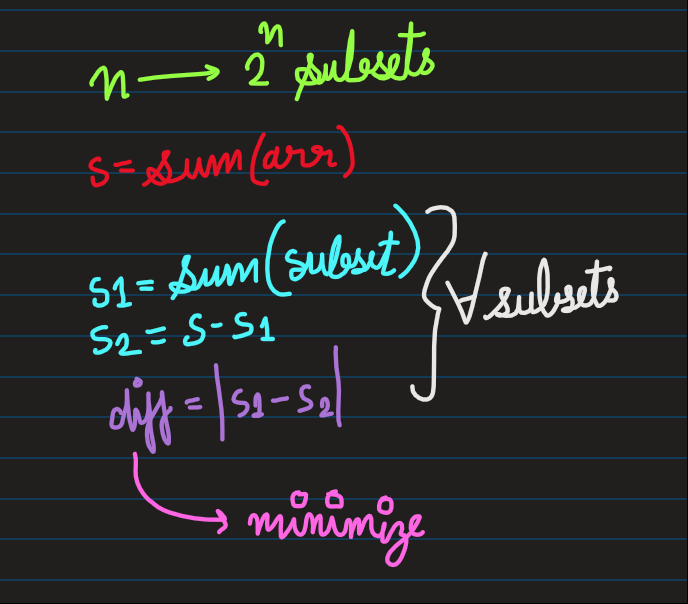

In [34]:
import itertools
from itertools import combinations, chain
 
def findsubsets(s, n):
    l=[]
    for i in range(n):
        l+=list(map(list, itertools.combinations(s, i+1)))
    return l
     
# Driver Code
s = [1, 6, 11, 5]
n = 4
 
print(findsubsets(s, n))

[[1], [6], [11], [5], [1, 6], [1, 11], [1, 5], [6, 11], [6, 5], [11, 5], [1, 6, 11], [1, 6, 5], [1, 11, 5], [6, 11, 5], [1, 6, 11, 5]]


In [37]:
def minDifference(arr, n):
    s= sum(arr)
    subsets= findsubsets(arr, n)
    # print(subsets)
    diff= []
    for i in subsets:
        s1=sum(i)
        s2= s-s1 
        d= abs(s1-s2)
        diff.append(d)
    return min(diff)

# MEMORY EXCEEDED


In [39]:
N = 2
arr= [1, 4]
# Output: 1
minDifference(arr, N)

3

In [52]:
def f(arr, idx, totalsum, s, dp, n):
    # print(f'arr: {arr}')
    # print(f'totalsum: {totalsum}')
    # print(f'idx: {idx}')
    # print(f's1: {totalsum-s}')
    # print(f's2: {s}')
    # print(f'dp:\n{dp}\n')
    if idx>=n:
        s1= s
        s2= totalsum-s
        return abs(s1-s2)
    
    if dp[idx][s]!=-2:
        return dp[idx][s]
    f1= f(arr, idx+1, totalsum, s+arr[idx], dp, n)
    f2= f(arr, idx+1, totalsum, s, dp, n)
    return min(f1, f2)



def minDifference(arr, n):
    totalsum= sum(arr)

    dp= [[-2 for i in range(n)] for j in range(totalsum+1)]
    return f(arr, 0, totalsum, 0, dp, n)
    

In [53]:
N = 2
arr= [1, 4]
# Output: 1
minDifference(arr, N)

3

In [28]:
# A Recursive Python3 program to solve
# minimum sum partition problem.
import sys

# Returns the minimum value of the
# difference of the two sets.


def findMin(a, n):

	su = 0

	# Calculate sum of all elements
	su = sum(a)

	# Create an 2d list to store results of subproblems
	dp = [[0 for i in range(su + 1)]
		for j in range(n + 1)]


	# print(f'dp= {dp}')

	# Initialize first column as true.
	# 0 sum is possible with all elements.
	for i in range(n + 1):
		dp[i][0] = True

	# Initialize top row, except dp[0][0], as false. With 0 elements, no other sum except 0 is possible
	for j in range(1, su + 1):
		dp[0][j] = False

	print('dp: ')
	for i in dp:
		print('\t', i)

		
	# Fill the partition table in bottom up manner
	for i in range(1, n + 1):
		for j in range(1, su + 1):

			# If i'th element is excluded
			dp[i][j] = dp[i - 1][j]

			# If i'th element is included
			if a[i - 1] <= j:
				dp[i][j] |= dp[i - 1][j - a[i - 1]]

	# Initialize difference of two sums.
	diff = sys.maxsize

	# Find the largest j such that dp[n][j] is true where j loops from sum/2 t0 0
	for j in range(su // 2, -1, -1):
		if dp[n][j] == True:
			diff = su - (2 * j)
			break

	return diff


# Driver code
a = [3, 1, 4, 2, 2, 1]
n = len(a)

print("\n\nThe minimum difference between "
	"2 sets is ", findMin(a, n))

# This code is contributed by Tokir Manva
# Time Complexity = O(n*sum)

dp: 
	 [True, False, False, False, False, False, False, False, False, False, False, False, False, False]
	 [True, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	 [True, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	 [True, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	 [True, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	 [True, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
	 [True, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


The minimum difference between 2 sets is  1


In [41]:
def minDifference(arr, n):

	print(f'arr= {arr}')
	# s = 0;
	s = sum(arr)
	# for i in range(n):
	# 	s += arr[i];
	print(f'sum= {s}')
	y = s // 2 + 1;
	
	# dp[i] gives whether is it possible to get i as sum of elements
	#  dd is helper variable, we use dd to ignoring duplicates
	dp = [False for i in range(y)]
	dd = [False for i in range(y)]
	
	print(f'y= {y} ')
	print(f'dp= {dp} ')
	print(f'dd= {dd} ')
	# Initialising dp and dd
	
	# sum = 0 is possible
	dd[0] = True;
	print(f'dd(modified)= {dd} ')


	for i in range(n):
	
		# updating dd[k] as True if k can be formed
		# using elements from 1 to i+1
		
		for j in range(y):
			if (j + arr[i] < y and dp[j]):
				dd[j + arr[i]] = True;
		
		# updating dd
		for j in range(y):
			if (dd[j]):
				dp[j] = True;
			dd[j] = False; # reset dd
		print(f'\ni= {i}\ndp: {dp}')

	# checking the number from sum/2 to 1 which is possible to get as sum
	for i in range(y-1, 0, -1):
		if (dp[i]):
			return (s - 2 * i);
		
		# since i is possible to form then another
		# number is sum-i so min. difference is sum-i-i
	return 0;


if __name__ == '__main__':

	arr = [ 1, 6, 11, 5 ];
	n = len(arr);
	print("\n\nThe Minimum difference of 2 sets is ", minDifference(arr, n));

# This code is contributed by umadevi9616
# Time Complexity: O(n*sum)
# Auxiliary Space: O(sum)

arr= [1, 6, 11, 5]
sum= 23
y= 12 
dp= [False, False, False, False, False, False, False, False, False, False, False, False] 
dd= [False, False, False, False, False, False, False, False, False, False, False, False] 
dd(modified)= [True, False, False, False, False, False, False, False, False, False, False, False] 

i= 0
dp: [True, False, False, False, False, False, False, False, False, False, False, False]

i= 1
dp: [True, False, False, False, False, False, True, False, False, False, False, False]

i= 2
dp: [True, False, False, False, False, False, True, False, False, False, False, True]

i= 3
dp: [True, False, False, False, False, True, True, False, False, False, False, True]


The Minimum difference of 2 sets is  1
